In [227]:
import numpy as np                  
import pandas as pd      
import json
import platypus as plat        
from matplotlib import pyplot as plt
import pygmo as pg

In [361]:
CONDORCET_CON_UNCAP = pd.json_normalize(json.load(open("dao/condorcet-conscious-uncap.json"))["data"])
CONDORCET_CON_UNCAP.insert(2, "map-id", order, True)
# CA_CON_UNCAP = pd.json_normalize(json.load(open("dao/uncap/combined-approval-conscious-uncap copy.json"))["data"]).insert(2, "map-id", order, True)
# RANGE_CON_UNCAP = pd.json_normalize(json.load(open("dao/uncap/range-conscious-uncap.json"))["data"]).insert(2, "map-id", order, True)
# BORDA_CON_UNCAP = pd.json_normalize(json.load(open("dao/uncap/borda-conscious-uncap.json"))["data"]).insert(2, "map-id", order, True)

# CA_COM_50 = pd.json_normalize(json.load(open("DAO-combined_approval-combined-50.json"))["data"]).insert(2, "map-id", order, True)
# BORDA_COM_50 = pd.json_normalize(json.load(open("DAO-borda-combined-50.json"))["data"]).insert(2, "map-id", order, True)
# RANGE_COM_50 = pd.json_normalize(json.load(open("DAO-range-combined-50.json"))["data"]).insert(2, "map-id", order, True)
# CONDORCET_COM_50 = pd.json_normalize(json.load(open("DAO-condorcet-combined-50.json"))["data"]).insert(2, "map-id", order, True)

# CA_CON_50 = pd.json_normalize(json.load(open("DAO-combined_approval-conscious-50.json"))["data"]).insert(2, "map-id", order, True)
# #BORDA_CON_50 = pd.json_normalize(json.load(open("DAO-borda-conscious-50.json"))["data"]).insert(2, "map-id", order, True)
# RANGE_CON_50 = pd.json_normalize(json.load(open("DAO-range-conscious-50.json"))["data"]).insert(2, "map-id", order, True)
# CONDORCET_CON_50 = pd.json_normalize(json.load(open("DAO-condorcet-conscious-50.json"))["data"]).insert(2, "map-id", order, True)

# # testing
# BORDA_CON_25 = pd.json_normalize(json.load(open("DAO-borda-conscious-25.json"))["data"])


FileNotFoundError: [Errno 2] No such file or directory: 'dao/condorcet-conscious-uncap.json'

In [356]:
# need to re add the specific maps the instance occured ine 
map_file = open("dao-inst-order.txt", "r")
order = []
for x in map_file:
    for i in range(0,5):
        temp = str(x)[8:len(x)-2]
        order.append(temp)


In [358]:
CONDORCET_CON_UNCAP.h

In [129]:
def percentage_change(data):
    per_change = []
    for i in range(1, len(data)):
        per_change.append( ((data[i] - data[i-1]) / data[i-1]) * 100)
    return per_change

In [130]:
def gen_time(df):
    gen_avg_time = []
    gen_time_df = df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
    for gen in gen_time_df:
        gen_times = []
        for time in gen_time_df[gen].tolist():
            gen_times.append(time)
        gen_avg_time.append(float(np.mean(gen_times)))

    running_sum = [gen_avg_time[0]]
    for i in range(1,6):
        running_sum.append(gen_avg_time[i-1] + gen_avg_time[i]) 
    return gen_avg_time, running_sum

In [135]:
def avg_gen_spar(df):
    gen_avg = []
    gen_spar_df = df.filter(["gen0-sparsity", "gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    for gen in gen_spar_df:
        gen_avg.append(float(np.mean(gen_spar_df[gen])))
    return gen_avg

In [136]:
# front must represented a a 2d matrix
def front_hv(front):
    inver = [] # make all objective cost negative
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
    inver.append(temp_row)
    
    ref = [0] * len(front[0]) # always use reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume object
    # Sometimes the front is too small to use 
    try: 
        h = hv.compute(ref)
    except ValueError:
        print("no good ref point for: ")
        h = 0
        print(front)
    return h

def avg_gen_hv(df):
    gen_avg = []
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    for gen in gen_front_df:
        gen_hv = []
        for front in gen_front_df[gen].tolist():
            try: 
                gen_hv.append(front_hv(front))
            except TypeError:
                x = 1
                #skip
        gen_avg.append(float(np.mean(gen_hv)))
    return gen_avg

In [243]:
uncap_con_borda_spar = avg_gen_spar(BORDA_CON_UNCAP)
uncap_con_range_spar = avg_gen_spar(RANGE_CON_UNCAP)
uncap_con_ca_spar = avg_gen_spar(CA_CON_UNCAP)
uncap_con_condorcet_spar = avg_gen_spar(CONDORCET_CON_UNCAP)

uncap_con_borda_spar_diff = percentage_change(uncap_con_borda_spar)
uncap_con_range_spar_diff = percentage_change(uncap_con_range_spar)
uncap_con_ca_spar_diff = percentage_change(uncap_con_ca_spar)
uncap_con_condorcet_spar_diff = percentage_change(uncap_con_condorcet_spar)

## COMBINED
com_borda_spar_50 = avg_gen_spar(BORDA_COM_50)
com_range_spar_50 = avg_gen_spar(RANGE_COM_50)
com_ca_spar_50 = avg_gen_spar(CA_COM_50)
com_condorcet_spar_50 = avg_gen_spar(CONDORCET_COM_50)

com_borda_spar_50_diff = percentage_change(com_borda_spar_50)
com_range_spar_50_diff = percentage_change(com_range_spar_50)
com_ca_spar_50__diff = percentage_change(com_ca_spar_50)
com_condorcet_spar_50_diff = percentage_change(com_condorcet_spar_50)

## CONSCIOUS
con_borda_spar_50 = avg_gen_spar(BORDA_CON_50)
con_range_spar_50 = avg_gen_spar(RANGE_CON_50)
con_ca_spar_50 = avg_gen_spar(CA_CON_50)
con_condorcet_spar_50 = avg_gen_spar(CONDORCET_CON_50)

con_borda_spar_50_diff = percentage_change(con_borda_spar_50)
con_range_spar_50_diff = percentage_change(con_range_spar_50)
con_ca_spar_50__diff = percentage_change(con_ca_spar_50)
con_condorcet_spar_50_diff = percentage_change(con_condorcet_spar_50)

In [266]:
con_borda_25_spar = avg_gen_spar(BORDA_CON_25)
con_borda_25_spar_diff = percentage_change(con_borda_25_spar)

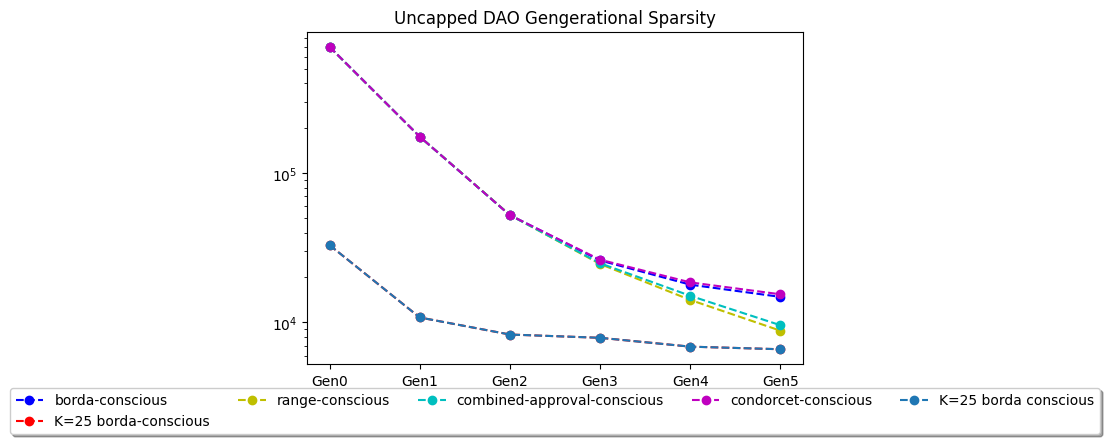

NameError: name 'con_ca_spar_50_diff' is not defined

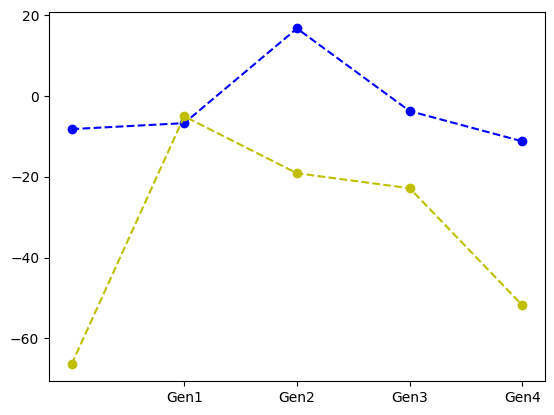

In [271]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_spar
ax.plot(y, '--bo', label='borda-conscious')


y = con_borda_25_spar
ax.plot(y, "--ro", label='K=25 borda-conscious')

y = uncap_con_range_spar
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_ca_spar
ax.plot(y, '--co', label='combined-approval-conscious')

y = uncap_con_condorcet_spar
ax.plot(y, '--mo', label='condorcet-conscious')

y = con_borda_25_spar
ax.plot(y, "--o", label="K=25 borda conscious")

plt.title("Uncapped DAO Gengerational Sparsity")
plt.yscale("log")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.show()


fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = con_borda_spar_50_diff
ax.plot(y, '--bo', label='borda-conscious')

y = con_range_spar_50_diff
ax.plot(y, '--yo', label='range-conscious')

y = con_ca_spar_50_diff
ax.plot(y, '--co', label='combined-approval-conscious')

y = con_condorcet_spar_50_diff
ax.plot(y, '--mo', label='condorcet-conscious')

y = con_borda_25_spar_diff
ax.plot(y, "--o", label="")



plt.title("Uncapped DAO Generational Sparsity Change")
plt.legend()
plt.show()

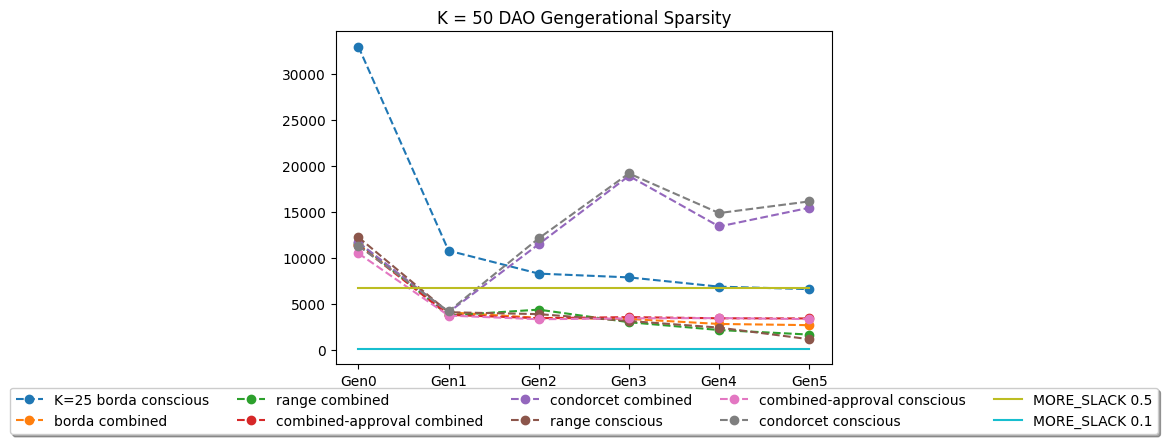

/var/folders/sz/10t46yj57l72d9m15rn_xnt80000gn/T/ipykernel_56436/378845765.py:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


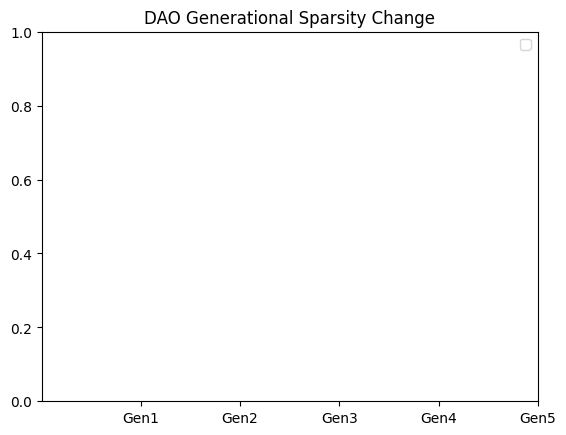

In [270]:

fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

# TEST
y = con_borda_25_spar
ax.plot(y, "--o", label="K=25 borda conscious")

# COMBINED
y = com_borda_spar_50
ax.plot(y, "--o", label='borda combined')

y = com_range_spar_50
ax.plot(y, "--o", label="range combined")

y = com_ca_spar_50
ax.plot(y, "--o", label="combined-approval combined")

y = com_condorcet_spar_50
ax.plot(y, "--o", label="condorcet combined")

# CONSCIOUS
# y = con_borda_spar_50
# ax.plot(y, "--o", label="borda conscious")

y = con_range_spar_50
ax.plot(y, "--o", label="range conscious")

y = con_ca_spar_50
ax.plot(y, "--o", label="combined-approval conscious")

y = con_condorcet_spar_50
ax.plot(y, "--o", label="condorcet conscious")

# UNCAP
# y = uncap_con_borda_spar
# ax.plot(y, '--bo', label='uncap-borda conscious')

# y = uncap_con_range_spar
# ax.plot(y, '--yo', label='uncap-range conscious')

# y = uncap_con_ca_spar
# ax.plot(y, '--co', label='uncap-combined-approval conscious')

# y = uncap_con_condorcet_spar
# ax.plot(y, '--mo', label='uncap-condorcet conscious')


# APEX
y = [6712.830881019108] * 6
ax.plot(y, label='MORE_SLACK 0.5')

y = [112.78247231847135] * 6
ax.plot(y, label='MORE_SLACK 0.1')


# y = [2332.961751464968] * 6
# ax.plot(y, label='RANDOM 0.5')

# y = [01.00408346496816] * 6
# ax.plot(y, label='RANDOM 0.1')

plt.title("K = 50 DAO Gengerational Sparsity")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])





# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.show()


fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


plt.title("DAO Generational Sparsity Change")
plt.legend()
plt.show()

In [258]:
uncap_con_borda_hv = avg_gen_hv(BORDA_CON_UNCAP)
uncap_con_range_hv = avg_gen_hv(RANGE_CON_UNCAP)
uncap_con_ca_hv = avg_gen_hv(CA_CON_UNCAP)
uncap_con_condorcet_hv = avg_gen_hv(CONDORCET_CON_UNCAP)

uncap_con_borda_hv_diff = percentage_change(uncap_con_borda_hv)
uncap_con_range_hv_diff = percentage_change(uncap_con_range_hv)
uncap_con_ca_hv_diff = percentage_change(uncap_con_ca_hv)
uncap_con_condorcet_hv_diff = percentage_change(uncap_con_condorcet_hv)

# COMBINED
com_borda_50_hv = avg_gen_hv(BORDA_COM_50)
com_range_50_hv = avg_gen_hv(RANGE_COM_50)
com_ca_50_hv = avg_gen_hv(CA_COM_50)
com_condorcet_50_hv = avg_gen_hv(CONDORCET_COM_50)

com_borda_50_hv_diff = percentage_change(com_borda_50_hv)
com_range_50_hv_diff = percentage_change(com_range_50_hv)
com_ca_50_hv_diff = percentage_change(com_ca_50_hv)
com_condorcet_50_hv_diff = percentage_change(com_condorcet_50_hv)

# CONSCIOUS
con_borda_50_hv = avg_gen_hv(BORDA_CON_50)
con_range_50_hv = avg_gen_hv(RANGE_CON_50)
con_ca_50_hv = avg_gen_hv(CA_CON_50)
con_condorcet_50_hv = avg_gen_hv(CONDORCET_CON_50)

con_borda_50_hv_diff = percentage_change(con_borda_50_hv)
con_range_50_hv_diff = percentage_change(con_range_50_hv)
con_ca_50_hv_diff = percentage_change(con_ca_50_hv)
con_condorcet_50_hv_diff = percentage_change(con_condorcet_50_hv)

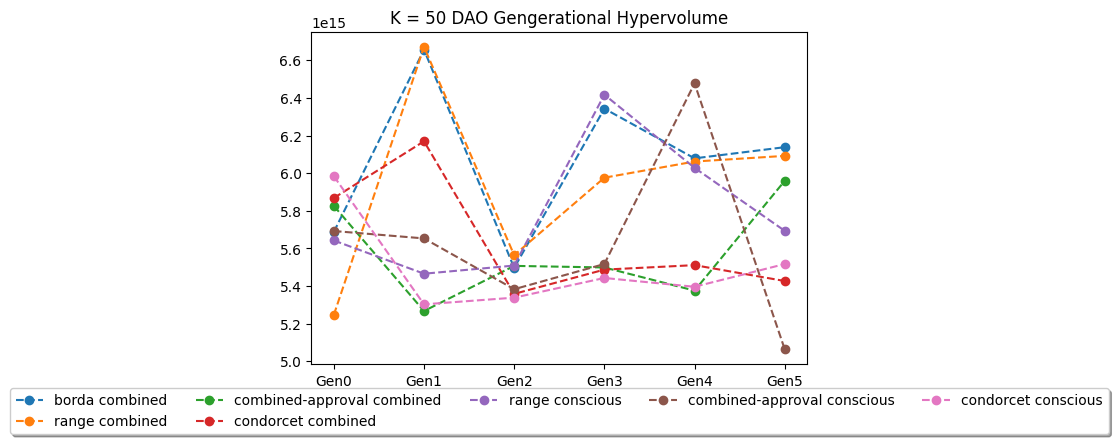

/var/folders/sz/10t46yj57l72d9m15rn_xnt80000gn/T/ipykernel_56436/764068758.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


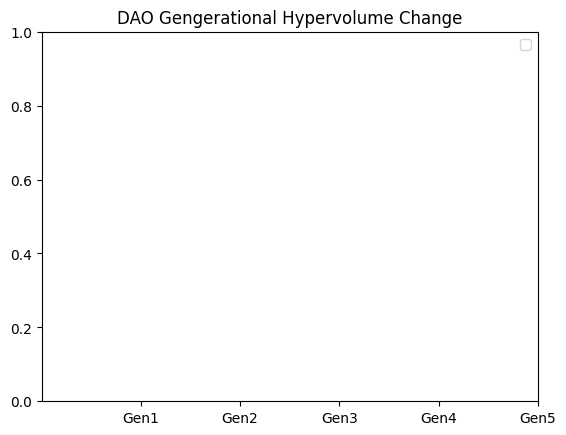

In [260]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

# COMBINED
y = com_borda_50_hv
ax.plot(y, "--o", label="borda combined")

y = com_range_50_hv
ax.plot(y, "--o", label="range combined")

y = com_ca_50_hv
ax.plot(y, "--o", label="combined-approval combined")

y = com_condorcet_50_hv
ax.plot(y, "--o", label="condorcet combined")

# CONSCIOUS
#y = con_borda_50_hv
#ax.plot(y, "--o", label="borda conscious")

y = con_range_50_hv
ax.plot(y, "--o", label="range conscious")

y = con_ca_50_hv
ax.plot(y, "--o", label="combined-approval conscious")

y = con_condorcet_50_hv
ax.plot(y, "--o", label="condorcet conscious")


plt.title("K = 50 DAO Gengerational Hypervolume")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.show()


fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)



plt.title("DAO Gengerational Hypervolume Change")
plt.legend()
plt.show()


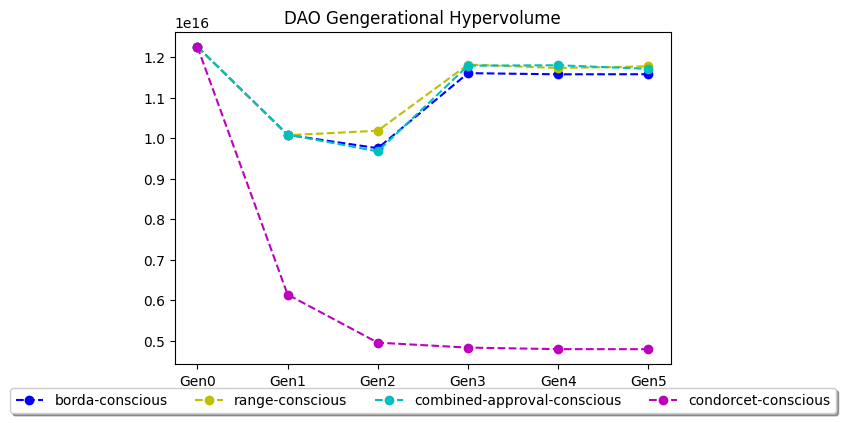

/var/folders/sz/10t46yj57l72d9m15rn_xnt80000gn/T/ipykernel_56436/3588613670.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


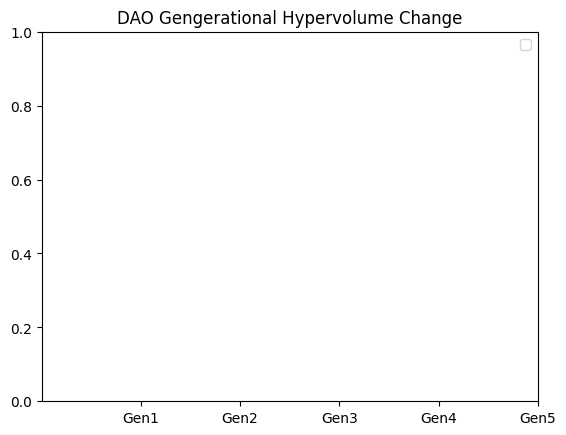

In [256]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = uncap_con_borda_hv
ax.plot(y, '--bo', label='borda-conscious')

y = uncap_con_range_hv
ax.plot(y, '--yo', label='range-conscious')

y = uncap_con_ca_hv
ax.plot(y, '--co', label='combined-approval-conscious')

y = uncap_con_condorcet_hv
ax.plot(y, '--mo', label='condorcet-conscious')


plt.title("DAO Gengerational Hypervolume")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)


plt.show()


fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)


plt.title("DAO Gengerational Hypervolume Change")
plt.legend()
plt.show()


In [263]:
uncap_com_borda_t, uncap_con_borda_rst = gen_time(BORDA_CON_UNCAP)
uncap_con_range_t, uncap_con_range_rst = gen_time(RANGE_CON_UNCAP)
uncap_con_ca_t, uncap_con_ca_rst = gen_time(CA_CON_UNCAP)
uncap_con_condorcet_t, uncap_con_condorcet_rst = gen_time(CONDORCET_CON_UNCAP)


# COMBINED
com_borda_50_t, com_borda_50_rst = gen_time(BORDA_COM_50)
com_range_50_t, com_range_50_rst = gen_time(RANGE_COM_50)
com_ca_50_t, com_ca_50_rst = gen_time(CA_COM_50)
com_condorcet_50_t, com_condorcet_50_rst = gen_time(CONDORCET_COM_50)

# CONSCIOUS
con_borda_50_t, con_borda_50_rst = gen_time(BORDA_CON_50)
con_range_50_t, con_range_50_rst = gen_time(RANGE_CON_50)
con_ca_50_t, con_ca_50_rst = gen_time(CA_CON_50)
con_condorcet_50_t, con_condorcet_50_rst = gen_time(CONDORCET_CON_50)


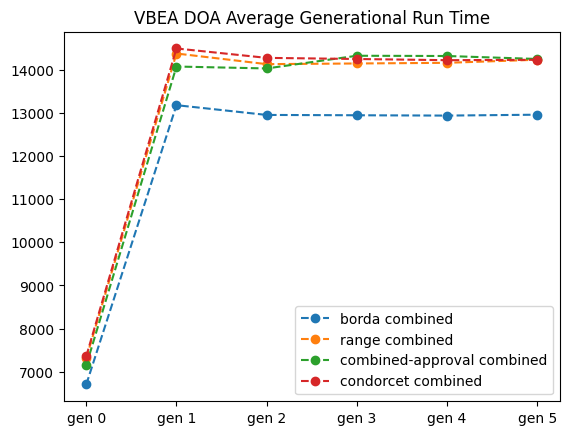

In [264]:
fig, ax = plt.subplots()

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, com_borda_50_rst, '--o', label = "borda combined")

plt.plot(x, com_range_50_rst, '--o', label = "range combined")

plt.plot(x, com_ca_50_rst, '--o', label = "combined-approval combined")

plt.plot(x, com_condorcet_50_rst, '--o', label = "condorcet combined")

plt.legend()
plt.title("VBEA DOA Average Generational Run Time")
plt.show()

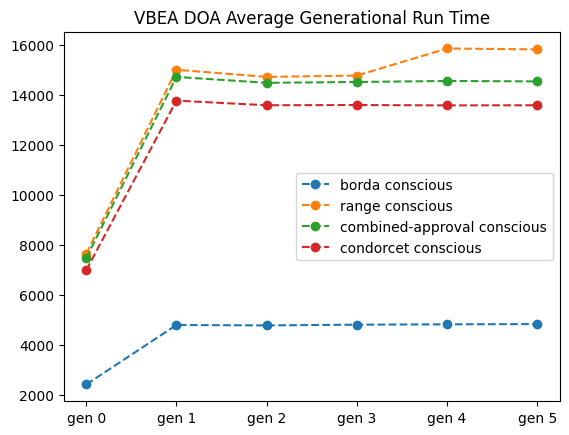

In [265]:
fig, ax = plt.subplots()

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, con_borda_50_rst, '--o', label = "borda conscious")

plt.plot(x, con_range_50_rst, '--o', label = "range conscious")

plt.plot(x, con_ca_50_rst, '--o', label = "combined-approval conscious")

plt.plot(x, con_condorcet_50_rst, '--o', label = "condorcet conscious")

plt.legend()
plt.title("VBEA DOA Average Generational Run Time")
plt.show()

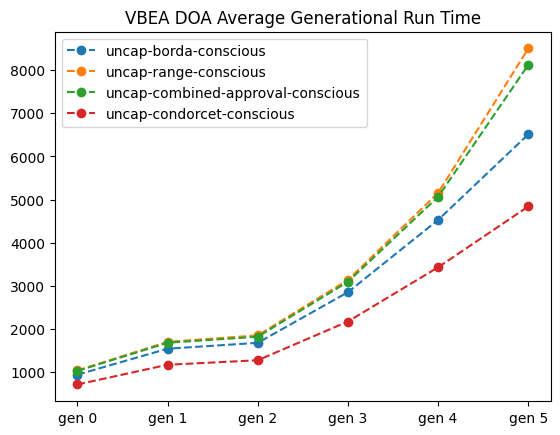

In [262]:
fig, ax = plt.subplots()

x = [0, 1, 2, 3, 4, 5]
xticks = ["gen 0", "gen 1", "gen 2", "gen 3", "gen 4", "gen 5"]
plt.xticks(x, xticks)

plt.plot(x, uncap_con_borda_rst, '--o', label = "uncap-borda-conscious")

plt.plot(x, uncap_con_range_rst, '--o', label = "uncap-range-conscious")

plt.plot(x, uncap_con_ca_rst, '--o', label = "uncap-combined-approval-conscious")

plt.plot(x, uncap_con_condorcet_rst, '--o', label = "uncap-condorcet-conscious")

plt.legend()
plt.title("VBEA DOA Average Generational Run Time")
plt.show()

In [143]:
def failure_rate(df):
    n = 156 * 5
    gen_runtimes = [df["gen0-time"].tolist(), 
            df["gen1-time"].tolist(), 
            df["gen2-time"].tolist(),
            df["gen3-time"].tolist(),
            df["gen4-time"].tolist(),
            df["gen5-time"].tolist()]
    error_rate = []
    for gen_time in gen_runtimes:
        count = 0;
        for time in gen_time:
           if(time == -1):
                count+= 1
        error_rate.append((count / n))

    return error_rate

In [ ]:
failure_rate

In [191]:
def avg_gen_front_size(df):
    gen_front_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    gen_front_avg = []
    gen_front_dist = []
    for gen in gen_front_df:
        gen_dist = []
        for front in gen_front_df[gen].tolist():
            gen_dist.append(len(front))
        gen_front_avg.append(float(np.mean(gen_dist)))
        gen_front_dist.append(gen_dist)
        
    return gen_front_avg, gen_front_dist

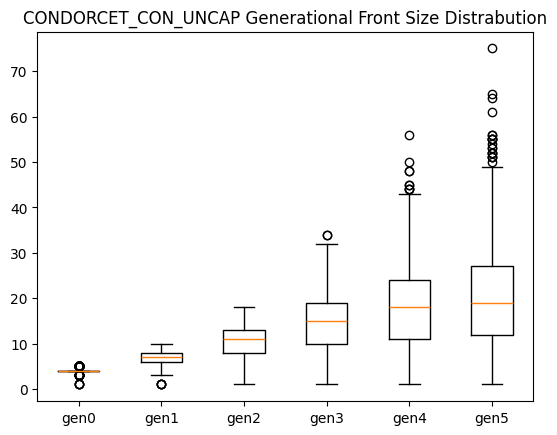

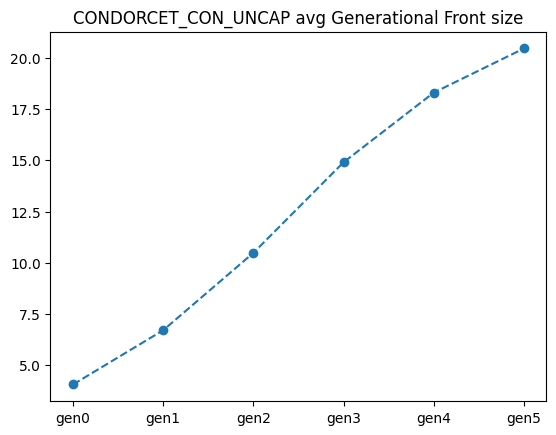

In [197]:
avg, dist = avg_gen_front_size(CONDORCET_CON_UNCAP)
xticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"] 

plt.boxplot(dist, tick_labels = xticks)
plt.title("CONDORCET_CON_UNCAP Generational Front Size Distrabution")
plt.show()

plt.plot(avg, "--o")
plt.title("CONDORCET_CON_UNCAP avg Generational Front size")
plt.xticks([0,1,2,3,4,5],xticks)

plt.show()



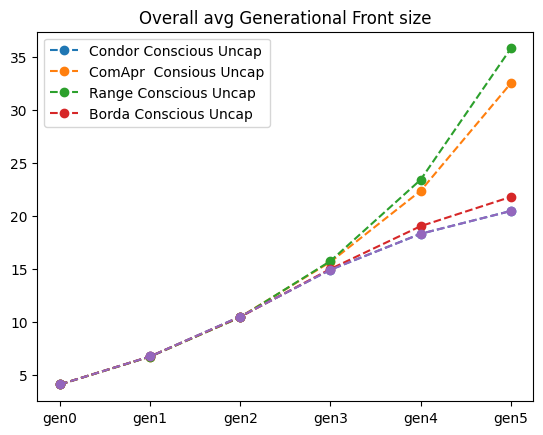

In [201]:
ConDor_con_avg, dist = avg_gen_front_size(CONDORCET_CON_UNCAP)
ComApr_con_avg, dist = avg_gen_front_size(CA_CON_UNCAP)
Range_con_avg, dist = avg_gen_front_size(RANGE_CON_UNCAP)
Borda_con_avg, dist = avg_gen_front_size(BORDA_CON_UNCAP)


plt.plot(ConDor_con_avg, "--o", label='Condor Conscious Uncap')
plt.plot(ComApr_con_avg, "--o", label='ComApr  Consious Uncap')
plt.plot(Range_con_avg, "--o", label="Range Conscious Uncap")
plt.plot(Borda_con_avg, "--o", label="Borda Conscious Uncap")

xticks = ["gen0", "gen1", "gen2", "gen3", "gen4", "gen5"] 

plt.plot(avg, "--o", label = "")
plt.title("Overall avg Generational Front size")
plt.xticks([0,1,2,3,4,5],xticks)
plt.legend()
plt.show()

